In [222]:
#Imports
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium


In [221]:
#Load and Combine CSV Files
data_path = r'C:\\Users\\thisi\\code\\DataCareerAnalysis\\data' 

# Use glob to get all the CSV file paths
csv_files = glob.glob(os.path.join(data_path, "*.csv"))

# List to hold the data frames
df_list = []

# Loop through the CSV files and read them into data frames
for file in csv_files:
    df = pd.read_csv(file)
    df_list.append(df)

# Concatenate all the data frames into one
df_combined = pd.concat(df_list, ignore_index=True)
df_original = df_combined
# df_combined = df_original # Revery to original 

df_combined.head()


,Keywords,Search Location,Job ID,Title,Company,City,Country,Type,Seniority,Posted,Collected Date,Applicants,Employees,Industry,Job URL,Job Description
0,Data Analyst,European Union,3927615333,Data Analyst Intern\nData Analyst Intern,Foxintelligence,Paris,France,On-site,Internship,2024-05-04,2024-08-02,100.0,51.0,Market Research,https://www.linkedin.com/jobs/search/?currentJ...,"""About the job\nChez Foxintelligence, nous som..."
1,Data Analyst,European Union,3985582505,Data Analyst Intern\nData Analyst Intern,Echo Analytics,Paris,France,On-site,NaN,2024-07-19,2024-08-02,0.0,51.0,Software Development,https://www.linkedin.com/jobs/search/?currentJ...,"""About the job\n🚀 Founded in 2021, Echo's narr..."
2,Data Analyst,European Union,3988104437,Junior Data Analyst\nJunior Data Analyst,ISO,Cracow,Poland,On-site,Entry level,2024-07-31,2024-08-02,85.0,5001.0,Insurance,https://www.linkedin.com/jobs/search/?currentJ...,"""About the job\nCompany Description\n\nWe help..."
3,Data Analyst,European Union,3986942433,Junior Data Analyst\nJunior Data Analyst,Intale,Athens,Greece,On-site,Associate,2024-07-30,2024-08-02,100.0,11.0,IT Services and IT Consulting,https://www.linkedin.com/jobs/search/?currentJ...,"""About the job\nIntale is a VC backed retail-t..."
4,Data Analyst,European Union,3987193886,Data Analyst Intern\nData Analyst Intern with ...,Mirakl,Paris,France,On-site,NaN,2024-07-30,2024-08-02,93.0,501.0,Software Development,https://www.linkedin.com/jobs/search/?currentJ...,"""About the job\nMirakl is the global leader in..."


In [185]:
#Cleaning Data
# Cleaning new line '\n' from Title and Job Description columns 
df_combined[['Title','Job Description']] = df_combined[['Title','Job Description']].replace('\n', ' ', regex=True) 

# Strip 'About the Job' from Job Descriptions 
# df_combined['Job Description'] = df_combined['Job Description'].str[15:] 

# Convert dates to Dateframe
df_combined['Posted'] = pd.to_datetime(df_combined['Posted']) 
df_combined['Collected Date'] = pd.to_datetime(df_combined['Collected Date'])
# print(df_combined.info())

# Fill NaN values in Employees and Applicants 
df_combined[['Employees', 'Applicants']] = df_combined[['Employees', 'Applicants']].fillna(0)
nan_counts = df_combined.isna().sum()
print('\nNaN counts per Column')
print(nan_counts)

# Convert Applicants & Employee Column TYPE (Floats > Integers) 
df_combined[['Employees', 'Applicants']] = df_combined[['Employees', 'Applicants']].astype(int)

# temp['year'] = temp['Posted'].dt.year
# temp
df_combined
print('\nColumn Types')

print(df_combined.dtypes)




NaN counts per Column
Keywords             0
Search Location      0
Job ID               0
Title                0
Company              0
City                 0
Country            900
Type                 0
Seniority          922
Posted             107
Collected Date       0
Applicants           0
Employees            0
Industry            72
Job URL              0
Job Description      0
dtype: int64

Column Types
Keywords                   object
Search Location            object
Job ID                      int64
Title                      object
Company                    object
City                       object
Country                    object
Type                       object
Seniority                  object
Posted             datetime64[ns]
Collected Date     datetime64[ns]
Applicants                  int32
Employees                   int32
Industry                   object
Job URL                    object
Job Description            object
dtype: object


In [220]:
# Cleaned Data.head()
df_combined.head()

,Keywords,Search Location,Job ID,Title,Company,City,Country,Type,Seniority,Posted,Collected Date,Applicants,Employees,Industry,Job URL,Job Description
0,Data Analyst,European Union,3927615333,Data Analyst Intern Data Analyst Intern,Foxintelligence,Paris,France,On-site,Internship,2024-05-04,2024-08-02,100,51,Market Research,https://www.linkedin.com/jobs/search/?currentJ...,"Chez Foxintelligence, nous sommes des amoureux..."
1,Data Analyst,European Union,3985582505,Data Analyst Intern Data Analyst Intern,Echo Analytics,Paris,France,On-site,NaN,2024-07-19,2024-08-02,0,51,Software Development,https://www.linkedin.com/jobs/search/?currentJ...,"🚀 Founded in 2021, Echo's narrative is one of ..."
2,Data Analyst,European Union,3988104437,Junior Data Analyst Junior Data Analyst,ISO,Cracow,Poland,On-site,Entry level,2024-07-31,2024-08-02,85,5001,Insurance,https://www.linkedin.com/jobs/search/?currentJ...,Company Description We help the world see new...
3,Data Analyst,European Union,3986942433,Junior Data Analyst Junior Data Analyst,Intale,Athens,Greece,On-site,Associate,2024-07-30,2024-08-02,100,11,IT Services and IT Consulting,https://www.linkedin.com/jobs/search/?currentJ...,Intale is a VC backed retail-tech company that...
4,Data Analyst,European Union,3987193886,Data Analyst Intern Data Analyst Intern with v...,Mirakl,Paris,France,On-site,NaN,2024-07-30,2024-08-02,93,501,Software Development,https://www.linkedin.com/jobs/search/?currentJ...,Mirakl is the global leader in platform busine...


Initial Exploration 

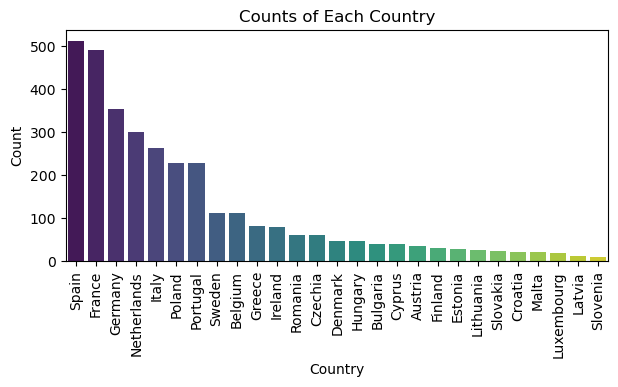

In [197]:
#Bar Chart of Count of Counties

# Convert dictionary to DataFrame for easier plotting with Seaborn
counts_df = pd.DataFrame(list(country_counts_dict.items()), columns=['Country', 'Count'])

plt.figure(figsize=(7, 3))
sns.barplot(x='Country', y='Count', hue = 'Country', data=counts_df, palette='viridis')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Counts of Each Country')
plt.xticks(rotation=90)
plt.show()

In [218]:
# Folium Count the instances of each country
country_counts = df_combined['Country'].value_counts()

# Convert to dictionary
country_counts_dict = country_counts.to_dict()

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(list(country_counts_dict.items()), columns=['country', 'count'])
print(counts_df)

# Load Europe GeoJSON
geojson_path = 'C:\\Users\\thisi\\code\\DataCareerAnalysis\\europe.geojson'
eu_countries = gpd.read_file(geojson_path)

# # Inspect the columns of the GeoDataFrame
# print(eu_countries.columns)
# eu_countries_df = pd.DataFrame(eu_countries)
# eu_countries_df.head()

# Merge data with geographical data using 'NAME' as the key
merged = eu_countries.set_index('NAME').join(counts_df.set_index('country'))

# Initialize a Folium map centered on Europe
m = folium.Map(location=[54, 15], zoom_start=4)

# Add the Choropleth layer
choropleth = Choropleth(
    geo_data=merged,
    name='choropleth',
    data=merged,
    columns=[merged.index, 'count'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Count by Country'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('eu_country_counts_map.html')

# Display the map
m

        country  count
0         Spain    512
1        France    492
2       Germany    355
3   Netherlands    301
4         Italy    263
5        Poland    228
6      Portugal    228
7        Sweden    112
8       Belgium    111
9        Greece     82
10      Ireland     79
11      Romania     61
12      Czechia     60
13      Denmark     47
14      Hungary     47
15     Bulgaria     40
16       Cyprus     39
17      Austria     34
18      Finland     30
19      Estonia     29
20    Lithuania     26
21     Slovakia     23
22      Croatia     22
23        Malta     22
24   Luxembourg     18
25       Latvia     12
26     Slovenia     10


ValueError: key_on `'properties.NAME'` not found in GeoJSON.

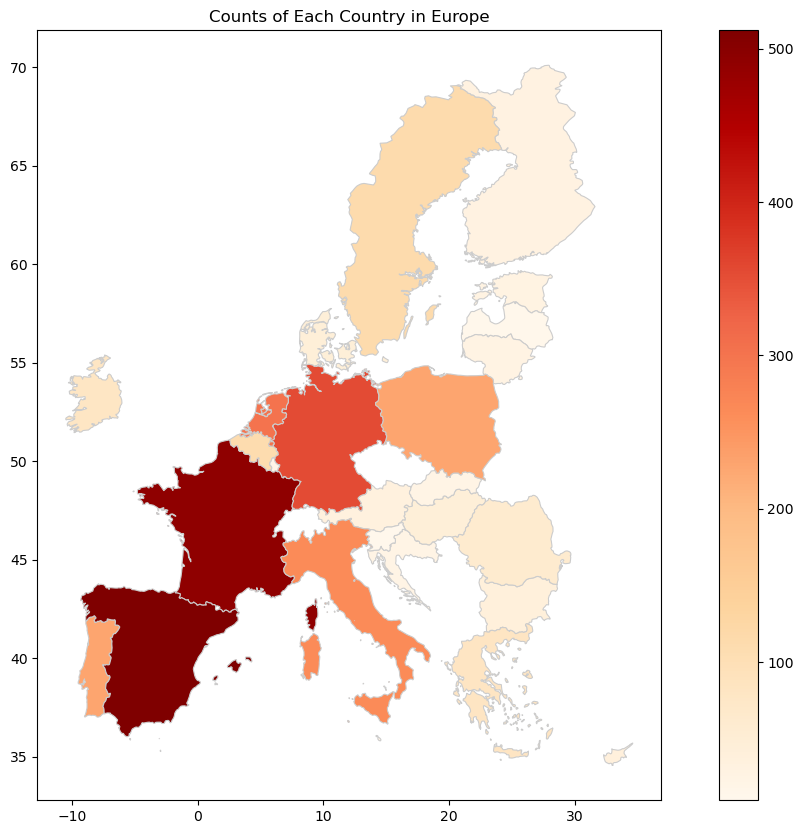

In [225]:
#GeoPandas Visualization of Count by Country 

# Count the instances of each country
country_counts = df_combined['Country'].value_counts()

# Convert to dictionary
country_counts_dict = country_counts.to_dict()

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(list(country_counts_dict.items()), columns=['Country', 'Count'])

# Load Europe GeoJSON
geojson_path = 'C:\\Users\\thisi\\code\\DataCareerAnalysis\\europe.geojson'
eu_countries = gpd.read_file(geojson_path)

# # Inspect the columns of the GeoDataFrame
# print(eu_countries.columns)

# eu_countries_df = pd.DataFrame(eu_countries)
# eu_countries_df.head()

# Merge data with geographical data using 'NAME' as the key
merged = eu_countries.set_index('NAME').join(counts_df.set_index('Country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Counts of Each Country in Europe')
plt.show()


In [228]:
#GeoPandas Visualization of Count by City 

# Count the instances of each country
city_counts = df_combined['City'].value_counts()

# Convert to dictionary
city_counts_dict = city_counts.to_dict()

# Convert the dictionary to a DataFrame
counts_df = pd.DataFrame(list(city_counts_dict.items()), columns=['Country', 'Count'])

# Load Europe GeoJSON
geojson_path = 'C:\\Users\\thisi\\code\\DataCareerAnalysis\\europe.geojson'
eu_countries = gpd.read_file(geojson_path)

# Merge data with geographical data using 'NAME' as the key
merged = eu_countries.set_index('NAME').join(counts_df.set_index('Country'))

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Counts of Each Country in Europe')
plt.show()


DriverError: C:\Users\thisi\code\DataCareerAnalysis\europe_cities.geojson: No such file or directory

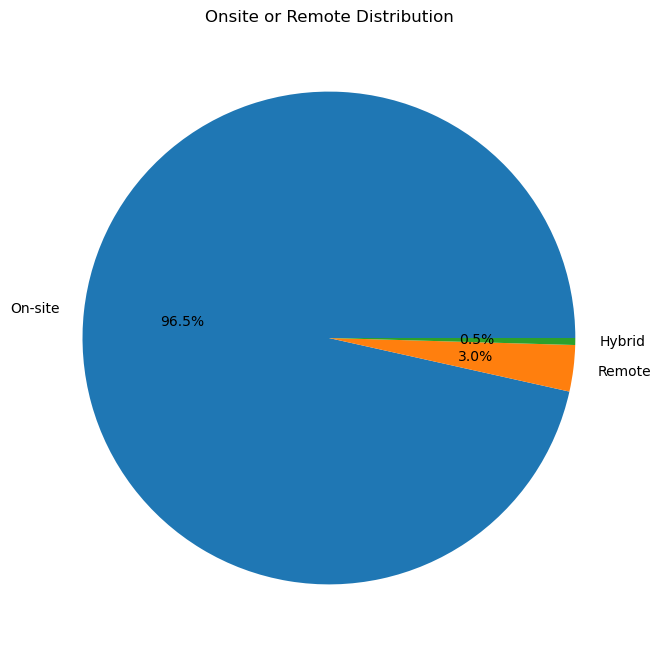

In [179]:
# PIE chart of remote_distribution
remote_distribution = df_combined['Type'].value_counts()
remote_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=360, figsize=(8, 8), )
plt.title('Onsite or Remote Distribution')
plt.ylabel('')  
# plt.legend()
plt.show()


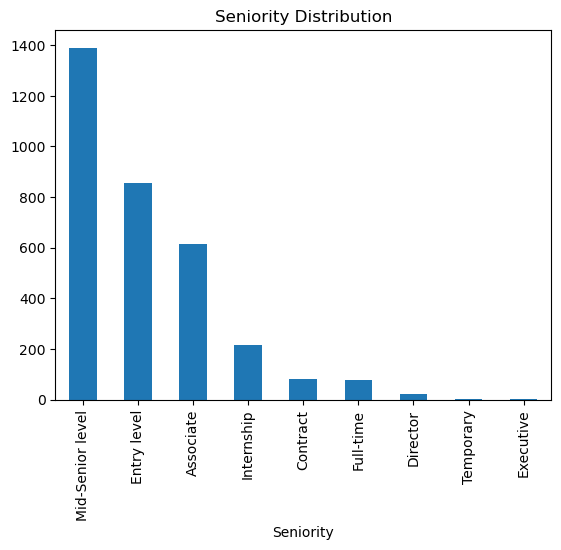

In [223]:
# BAR chart of Seniority 
remote_distribution = df_combined['Seniority'].value_counts()
remote_distribution.plot(kind='bar')
plt.title('Seniority Distribution')
plt.ylabel('')  
# plt.legend()
plt.show()


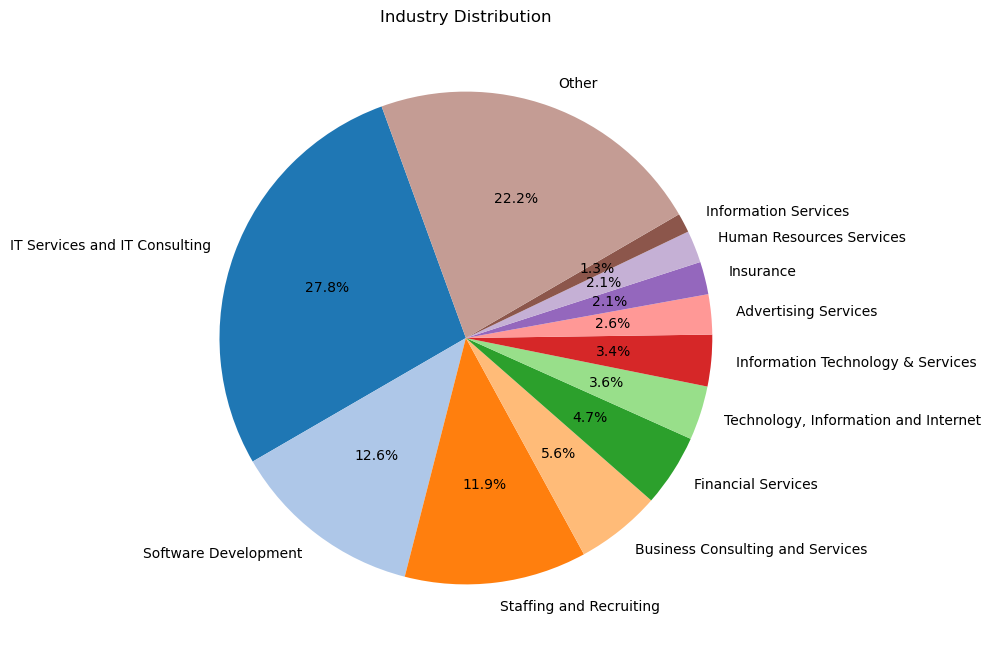

In [217]:
# Count the instances of each industry
industry_distribution = df_combined['Industry'].value_counts()

# Set a threshold to remove smaller percentages 
threshold = 50  

# Group smaller values into 'Other'
above_threshold = industry_distribution[industry_distribution > threshold]
below_threshold = industry_distribution[industry_distribution <= threshold]

# Create a new Series including the 'Other' category
other_sum = pd.Series(below_threshold.sum(), index=['Other'])
combined_distribution = pd.concat([above_threshold, other_sum])

# Define a color palette using tab20
colors = plt.get_cmap('tab20').colors

# Plot using Matplotlib
plt.figure(figsize=(8, 8))
plt.pie(combined_distribution, labels=combined_distribution.index, autopct='%1.1f%%', startangle=110, colors=colors)
plt.title('Industry Distribution')
plt.ylabel('')  
plt.show()


In [ ]:
TODO
# Size of Company by Country 
#Average age of jobs 
#How long are jobs up before they get 100 applicants 
#Mean Mediun Mode of all 
#What day of the week are most jobs posted? 
#
